In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_all = pd.read_csv("../Output/HM-FS/Features/Features_All.csv")


In [4]:
fts = pd.read_csv("../Output/HM-FS/Clustering/Labels/1088.csv")
fts = fts['Feature'].unique()

In [5]:
from sklearn.preprocessing import MinMaxScaler

df_all = df_all.loc[df_all['Feature'].isin(fts)]
df_all = df_all[df_all['ContourType'] == 'Manual']
df_all = df_all[['PatID', 'Fraction', 'Feature', 'FeatureValue']]

fts = df_all['Feature'].unique()

df_all['RS'] = 0
for ft in fts:
    df_ft = df_all.loc[df_all['Feature'] == ft]
    vals = df_ft['FeatureValue'].values
    vals = MinMaxScaler(feature_range=(0,1)).fit_transform(vals.reshape(-1, 1))
    df_all.loc[df_all['Feature'] == ft, 'RS'] = vals

In [7]:
patIDs = df_all['PatID'].unique()
rand_pats = np.random.choice(patIDs, 1, replace=False)
df_plot = df_all[df_all['PatID'].isin(rand_pats)]
# df_plot['Feature'] = df_plot['Group'] + '_' + df_plot['Feature']

fts = df_plot['Feature'].unique()


c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  # This is added back by InteractiveShellApp.init_path()


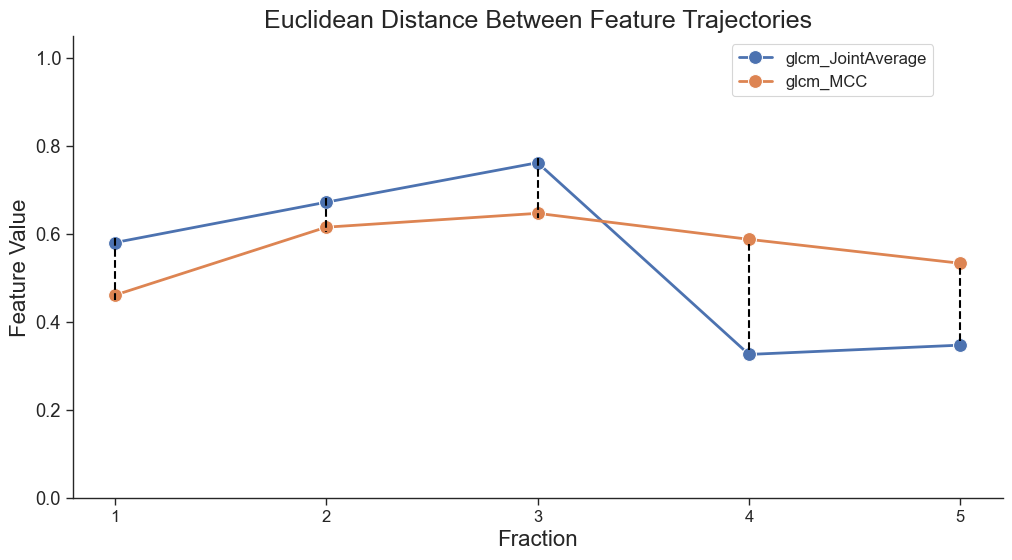

In [90]:
rand_fts = np.random.choice(fts, 2, replace=False)
df_plot = df_plot.loc[df_plot['Feature'].isin(fts)]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_context("paper", font_scale=1.5)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# plot
sns.lineplot(data = df_plot.loc[df_plot['Feature'] == rand_fts[0]], x = 'Fraction', y='RS', ax=ax, label=rand_fts[0], linewidth=2, legend=True, palette='muted', marker='o', markersize=10)
#sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[0]], x = 'Fraction', y='FeatureValue', ax=ax, s=100, legend=True, palette='muted')

sns.lineplot(data = df_plot.loc[df_plot['Feature'] == rand_fts[1]], x = 'Fraction', y='RS', ax=ax, label=rand_fts[1], linewidth=2, legend=True, palette='muted', marker='o', markersize=10)
#sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[1]], x = 'Fraction', y='FeatureValue', ax=ax, s=100, legend=True, palette='muted')

ax.set_xlabel('Fraction', fontsize=16)
ax.set_ylabel('Feature Value', fontsize=16)
ax.set_xticks(np.arange(1, 5.1, 1))
ax.set_xticklabels(np.arange(1, 6, 1), fontsize=12)
ax.set_title('Euclidean Distance Between Feature Trajectories', fontsize=18)
ax.set_ylim([0, 1.05])
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.7, 1))
y_vals1 = df_plot.loc[df_plot['Feature'] == rand_fts[0]]['RS'].values + 0.01
y_vals2 = df_plot.loc[df_plot['Feature'] == rand_fts[1]]['RS'].values - 0.01

for i in range(1, 6):
    ax.vlines(i, y_vals1[i-1], y_vals2[i-1], color='black', linestyle='dashed', linewidth=1.5)

sns.set_theme(style="ticks", rc=custom_params)
